In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [39]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-10-09 10:22:40--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-10-09 10:22:40 (114 MB/s) - ‘insurance.csv.3’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
labels = dataset.columns
print(labels)

# Encoding the object type columns
dataset = pd.get_dummies(dataset, prefix = ['sex', 'smoker'] , columns = ['sex', 'smoker'], drop_first = True)
dataset = pd.get_dummies(dataset, prefix = ['region'] , columns = ['region'], drop_first = False)
dataset.head()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,0,1
1,18,33.8,1,1725.55,1,0,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,0,1,0
3,33,22.7,0,21984.47,1,0,0,1,0,0
4,32,28.9,0,3866.86,1,0,0,1,0,0


In [41]:
# Splitting the data
print(dataset.shape)
p = int(dataset.shape[0] * 0.8)
train_dataset = dataset[:p]
print(train_dataset.shape)
test_dataset = dataset[p:]
print(test_dataset.shape)

(1338, 10)
(1070, 10)
(268, 10)


In [42]:
train_labels = train_dataset['expenses']
train_dataset.drop('expenses', axis = 1, inplace = True)
train_labels.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [44]:
test_labels = test_dataset['expenses']
test_dataset.drop('expenses', axis = 1, inplace = True)
test_labels.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


1070    39871.70
1071    13974.46
1072     1909.53
1073    12096.65
1074    13204.29
Name: expenses, dtype: float64

In [45]:
# Build a Model

model = tf.keras.models.Sequential([
    layers.Input(shape=(train_dataset.shape[1]),),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,901
Trainable params: 4,883
Non-trainable params: 18
_________________________________________________________________


In [51]:
# train the model
model.fit(train_dataset,train_labels, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 31787856.0000 - mae: 3498.9851 - mse: 31787856.0000
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 36084076.0000 - mae: 3949.2173 - mse: 36084076.0000
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 32326026.0000 - mae: 3574.3945 - mse: 32326026.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 30245076.0000 - mae: 3485.3513 - mse: 30245076.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 37900780.0000 - mae: 3836.4165 - mse: 37900780.0000
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 29976384.0000 - mae: 3431.8403 - mse: 29976384.0000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 34213220.0000 - mae: 3767.3511 - mse: 34213220.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 30209442.0000 - mae: 3564.4443 - mse: 30209442.0000


9/9 - 0s - loss: 25351894.0000 - mae: 2376.3152 - mse: 25351894.0000 - 31ms/epoch - 3ms/step
Testing set Mean Abs Error: 2376.32 expenses
You passed the challenge. Great job!


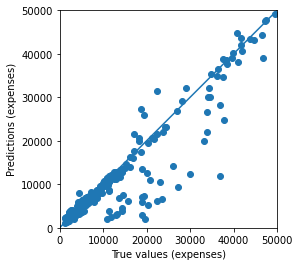

In [52]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
